In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, norm, shapiro
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import seaborn as sns




In [55]:
df = pd.read_excel('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\MCR\\MCR_CtrlvTrt\\Para_Scores_Summary.xlsx', sheet_name = "Sheet1")
df.head()

,Label,sample,trt_time,orient,spectra_num,details,Class,Scores on Comp 3 (47.33%),Scores on Comp 4 (41.47%)
0,20250616,Ctrl,20mins,Para,1,0616-Ctrl-20mins-Para,20mins,0.312112,0.666018
1,20250616,Ctrl,20mins,Para,2,0616-Ctrl-20mins-Para,20mins,0.367634,0.575218
2,20250616,Ctrl,20mins,Para,3,0616-Ctrl-20mins-Para,20mins,0.448281,0.547474
3,20250616,Ctrl,20mins,Para,4,0616-Ctrl-20mins-Para,20mins,0.431457,0.536454
4,20250616,Ctrl,20mins,Para,6,0616-Ctrl-20mins-Para,20mins,0.540792,0.424251


In [56]:

data = []
for x in ['2mins','20mins', '40mins', '60mins', '24h']:
    dff = df[df['trt_time'].str.contains(x)]
    print(f"{shapiro(dff['Scores on Comp 4 (41.47%)'])[1]}")
    tukey = pairwise_tukeyhsd(endog=dff['Scores on Comp 4 (41.47%)'],
                            groups=dff['sample'],
                            alpha=0.05)
    #display results
    #print(f"Results for {x}")
    #print(tukey)
    #print('*****************************************************')
    data.append(pd.DataFrame(tukey.summary().data[1:], columns = tukey.summary().data[0]))

0.01541414970127926
0.2603211468440037
0.003106043787912556
0.3245583712539572
0.001270830665330804


In [57]:
stat_results = pd.concat(data).reset_index(drop=True).iloc[:13, :]
stat_results.insert(7, 'sig', value = ['**' if x < 0.01 else ('*' if x<0.05  else 'ns') for x in stat_results['p-adj']])
stat_results#.head()

,group1,group2,meandiff,p-adj,lower,upper,reject,sig
0,Ctrl,Trt,-0.2339,0.0000,-0.2901,-0.1777,True,**
1,Ctrl,Trt_24h,-0.0678,0.0137,-0.1240,-0.0117,True,*
2,Trt,Trt_24h,0.1661,0.0000,0.1099,0.2222,True,**
3,Ctrl,Trt,-0.2611,0.0000,-0.3301,-0.1920,True,**
4,Ctrl,Trt_24h,-0.0858,0.0081,-0.1527,-0.0189,True,**
5,Trt,Trt_24h,0.1752,0.0000,0.1072,0.2432,True,**
6,Ctrl,Trt,-0.2972,0.0000,-0.3573,-0.2370,True,**
7,Ctrl,Trt_24h,-0.0923,0.0006,-0.1490,-0.0356,True,**
8,Trt,Trt_24h,0.2049,0.0000,0.1471,0.2626,True,**
9,Ctrl,Trt,-0.2880,0.0000,-0.3365,-0.2396,True,**


In [58]:
df['trt_time'].unique()

array(['20mins', '24h', '2mins', '40mins', '60mins', '20mins24h',
       '2mins24h', '40mins24h', '60mins24h'], dtype=object)

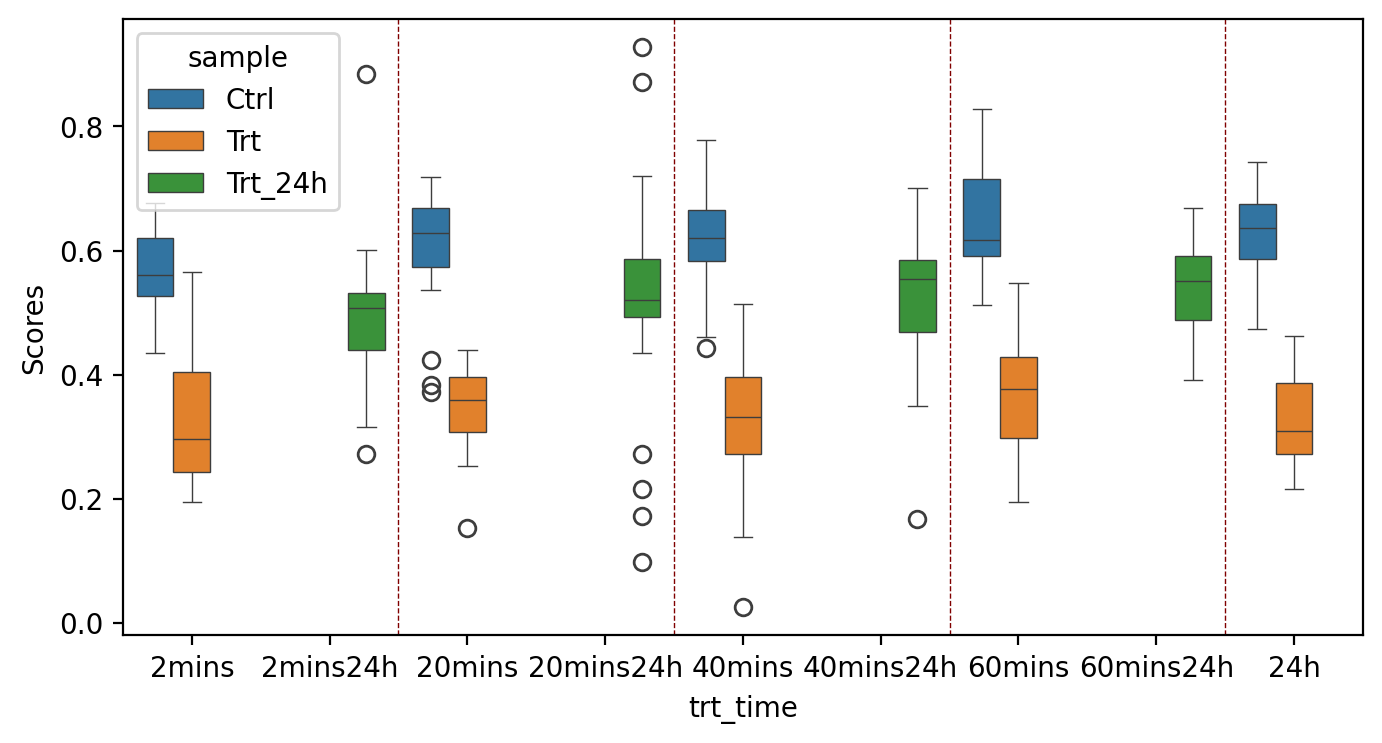

In [59]:
plt.figure(figsize = (8, 4), dpi = 200);
sns.boxplot(
    x = 'trt_time',
    y = 'Scores on Comp 4 (41.47%)',
    data = df,
    hue = 'sample',
    order = ['2mins', '2mins24h', '20mins', '20mins24h', '40mins', '40mins24h', '60mins', 
       '60mins24h','24h'],
       linewidth = .5,
       dodge=True
);
'''plt.xticks(position = [-0.25, 0, .5, 1, 2.5, 2,2.5, 4, 4.5, 5, 5.5, 6, 7.5, 8, 9.5, 10, 11.5, 12],
           labels= ['2mins', '2mins24h', '20mins', '20mins24h', '40mins', '40mins24h', ' ', '60mins', 
       '60mins24h',' ', '24h'],
           rotation = 45);'''

#plt.xticks([0.3]) 
#ax.set_xticks(positions)
plt.ylabel('Scores');
#plt.axvline(-0.25)
for l in [1.5, 3.5, 5.5, 7.5]:
    plt.axvline(l, ls = '--', color = 'maroon', lw = .5)